In [1]:
import pandas as pd
data =pd.read_csv(r'C:\Users\lakha\data_sets\nba.games.stats1.csv')
data.head()

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,GameResult
0,ATL,1,29-10-2014,Away,TOR,L,102,109,40,80,...,33,0.818,16,48,26,13,9,9,22,0
1,ATL,2,01-11-2014,Home,IND,W,102,92,35,69,...,21,0.857,11,44,25,5,5,18,26,1
2,ATL,3,05-11-2014,Away,SAS,L,92,94,38,92,...,38,0.711,11,50,25,7,9,19,15,0
3,ATL,4,07-11-2014,Away,CHO,L,119,122,43,93,...,27,0.741,11,51,31,6,7,19,30,0
4,ATL,5,08-11-2014,Home,NYK,W,103,96,33,81,...,11,0.727,13,44,26,2,6,15,29,1


In [2]:
feature_cols =['FieldGoals','FieldGoalsAttempted','X3PointShots','X3PointShotsAttempted','FreeThrows','FreeThrowsAttempted','Assists','Steals','Blocks','Turnovers','TotalFouls']
X = data[feature_cols] 
y= data.GameResult

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [4]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\lakha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[921, 281],
       [346, 912]], dtype=int64)

In [6]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

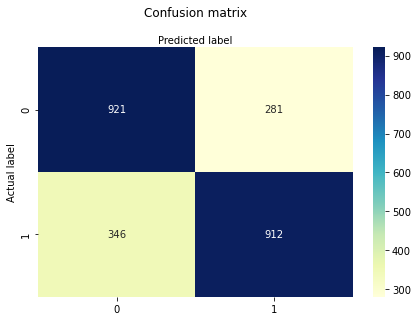

In [7]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7451219512195122
Precision: 0.7644593461860855
Recall: 0.724960254372019


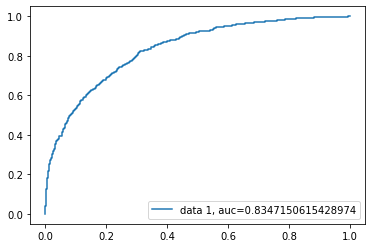

In [9]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()